In [98]:
#load depdencies and source data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

anfis = None

def initializedata():
    global anfis
   
    anfis = pd.read_csv('Data to be Modeled with ANFIS.csv')
    
#print data summary
initializedata()
print('MIN ')
print(anfis.min())
print('MAX ')
print(anfis.max())
anfis

MIN 
X1    5.000
X2    8.000
Y     1.376
dtype: float64
MAX 
X1    10.000
X2    16.000
Y     12.288
dtype: float64


,X1,X2,Y
0,5.0,8.0,9.8014
1,5.0,8.5,8.6765
2,5.0,9.0,7.5033
3,5.0,9.5,6.1938
4,5.0,10.0,5.0918
...,...,...,...
437,10.0,14.0,7.6936
438,10.0,14.5,8.3455
439,10.0,15.0,9.8809
440,10.0,15.5,10.8375


In [99]:
#LAYER0
# anfis['X1'] = x1
# anfis['X2'] = x2

anfis

,X1,X2,Y
0,5.0,8.0,9.8014
1,5.0,8.5,8.6765
2,5.0,9.0,7.5033
3,5.0,9.5,6.1938
4,5.0,10.0,5.0918
...,...,...,...
437,10.0,14.0,7.6936
438,10.0,14.5,8.3455
439,10.0,15.0,9.8809
440,10.0,15.5,10.8375


,X1,X2,Y,S1,M1,L1,S2,M2,L2
0,5.0,8.0,9.8014,1.000000,0.024961,0.008035,1.000000,0.019392,0.009447
1,5.0,8.5,8.6765,1.000000,0.024961,0.008035,0.998403,0.032635,0.012195
2,5.0,9.0,7.5033,1.000000,0.024961,0.008035,0.975039,0.058824,0.016009
3,5.0,9.5,6.1938,1.000000,0.024961,0.008035,0.885269,0.114731,0.021414
4,5.0,10.0,5.0918,1.000000,0.024961,0.008035,0.709421,0.240356,0.029259
...,...,...,...,...,...,...,...,...,...
437,10.0,14.0,7.6936,0.008035,0.024961,1.000000,0.029259,0.240356,0.709421
438,10.0,14.5,8.3455,0.008035,0.024961,1.000000,0.021414,0.114731,0.885269
439,10.0,15.0,9.8809,0.008035,0.024961,1.000000,0.016009,0.058824,0.975039
440,10.0,15.5,10.8375,0.008035,0.024961,1.000000,0.012195,0.032635,0.998403


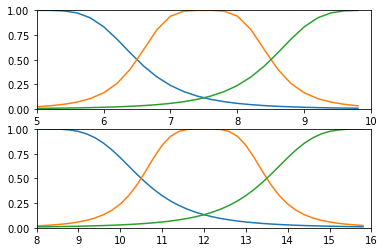

In [100]:
#LAYER 1 


#Phase 0 starting parameters for linguistic term membership functions
#These will be adjusted through Phase 1 experimentation
#and eventually automated through backpropogation gradient descent in Phase 3
# params are stored in dictionary p so that param names can be refered to via string variables
#    important for experimentation
p = {'S1alpha' : 1.5,   'S1beta' : 2,   'S1gamma' : 5, 
     'M1alpha' : 1,     'M1beta' : 2,  'M1gamma' : 7.5, 
     'L1alpha' : 1.5,   'L1beta' : 2,   'L1gamma' : 10, 
     'S2alpha' : 2.5,   'S2beta' : 2,   'S2gamma' : 8, 
     'M2alpha' : 1.5,   'M2beta' : 2,   'M2gamma' : 12, 
     'L2alpha' : 2.5,  'L2beta' : 2, 'L2gamma' : 16}

def Layer1():
    """" set starting values for alpha beta gamma for S1, M1, L1, S2, M2, L2
         and calculate linguistic term membership"""

    global anfis

    # calulate membership
    #     X1 in S1, M1, L1
    #     X2 in S2, M2, L2
    # using generalized bell function
    anfis['S1'] = 1 / (1+abs( (anfis['X1']-p['S1gamma']) / p['S1alpha'])**(2*p['S1beta']) )
    anfis['M1'] = 1 / (1+abs( (anfis['X1']-p['M1gamma']) / p['M1alpha'])**(2*p['M1beta']) )
    anfis['L1'] = 1 / (1+abs( (anfis['X1']-p['L1gamma']) / p['L1alpha'])**(2*p['L1beta']) )
    anfis['S2'] = 1 / (1+abs( (anfis['X2']-p['S2gamma']) / p['S2alpha'])**(2*p['S2beta']) )
    anfis['M2'] = 1 / (1+abs( (anfis['X2']-p['M2gamma']) / p['M2alpha'])**(2*p['M2beta']) )
    anfis['L2'] = 1 / (1+abs( (anfis['X2']-p['L2gamma']) / p['L2alpha'])**(2*p['L2beta']) )
    

def PlotMembershipFunctions():
    """plot S1, M1, L1, S2, M2, L2 Membership functions"""

    #create figure with 2 rows, 1 column of axes    
    fig, axes = plt.subplots(2, 1)

    #calulate x, y values for S1, M1, L1
    xdata = np.arange(5, 10, .2)
    S1Y = 1 / (1+abs( (xdata-p['S1gamma']) / p['S1alpha'])**(2*p['S1beta']) )
    M1Y = 1 / (1+abs( (xdata-p['M1gamma']) / p['M1alpha'])**(2*p['M1beta']) )
    L1Y = 1 / (1+abs( (xdata-p['L1gamma']) / p['L1alpha'])**(2*p['L1beta']) )
    #plot S1, M1, L1
    axes[0].axis([5, 10, 0, 1])
    axes[0].plot(xdata, S1Y, color = 'tab:blue')
    axes[0].plot(xdata, M1Y, color = 'tab:orange')
    axes[0].plot(xdata, L1Y, color = 'tab:green')

    #calculate x, y values for S1, M1, L1
    xdata = np.arange(8, 16, .2)
    S2Y = 1 / (1+abs( (xdata-p['S2gamma']) / p['S2alpha'])**(2*p['S2beta']) )
    M2Y = 1 / (1+abs( (xdata-p['M2gamma']) / p['M2alpha'])**(2*p['M2beta']) )
    L2Y = 1 / (1+abs( (xdata-p['L2gamma']) / p['L2alpha'])**(2*p['L2beta']) )
    #plot S1, M1, L1
    axes[1].axis([8, 16, 0, 1])
    axes[1].plot(xdata, S2Y, color = 'tab:blue')
    axes[1].plot(xdata, M2Y, color = 'tab:orange')
    axes[1].plot(xdata, L2Y, color = 'tab:green')

Layer1()
PlotMembershipFunctions()
anfis

In [101]:
#LAYER 2

def Layer2():

    """Calculate rule weights
    rule activation = cartesian product of (S1, M1, L1) X (S2, M2, L2)
     R1-R9 = raw rule activation """

    global anfis

    anfis['R1'] = anfis['S1'] * anfis['S2'] # antecedent = when x1 is Small and x2 is Small...
    anfis['R2'] = anfis['S1'] * anfis['M2']
    anfis['R3'] = anfis['S1'] * anfis['L2']
    anfis['R4'] = anfis['M1'] * anfis['S2']
    anfis['R5'] = anfis['M1'] * anfis['M2']
    anfis['R6'] = anfis['M1'] * anfis['L2']
    anfis['R7'] = anfis['L1'] * anfis['S2']
    anfis['R8'] = anfis['L1'] * anfis['M2']
    anfis['R9'] = anfis['L1'] * anfis['L2']

Layer2()
anfis

,X1,X2,Y,S1,M1,L1,S2,M2,L2,R1,R2,R3,R4,R5,R6,R7,R8,R9
0,5.0,8.0,9.8014,1.000000,0.024961,0.008035,1.000000,0.019392,0.009447,1.000000,0.019392,0.009447,0.024961,0.000484,0.000236,0.008035,0.000156,0.000076
1,5.0,8.5,8.6765,1.000000,0.024961,0.008035,0.998403,0.032635,0.012195,0.998403,0.032635,0.012195,0.024921,0.000815,0.000304,0.008022,0.000262,0.000098
2,5.0,9.0,7.5033,1.000000,0.024961,0.008035,0.975039,0.058824,0.016009,0.975039,0.058824,0.016009,0.024338,0.001468,0.000400,0.007834,0.000473,0.000129
3,5.0,9.5,6.1938,1.000000,0.024961,0.008035,0.885269,0.114731,0.021414,0.885269,0.114731,0.021414,0.022097,0.002864,0.000535,0.007113,0.000922,0.000172
4,5.0,10.0,5.0918,1.000000,0.024961,0.008035,0.709421,0.240356,0.029259,0.709421,0.240356,0.029259,0.017708,0.006000,0.000730,0.005700,0.001931,0.000235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,10.0,14.0,7.6936,0.008035,0.024961,1.000000,0.029259,0.240356,0.709421,0.000235,0.001931,0.005700,0.000730,0.006000,0.017708,0.029259,0.240356,0.709421
438,10.0,14.5,8.3455,0.008035,0.024961,1.000000,0.021414,0.114731,0.885269,0.000172,0.000922,0.007113,0.000535,0.002864,0.022097,0.021414,0.114731,0.885269
439,10.0,15.0,9.8809,0.008035,0.024961,1.000000,0.016009,0.058824,0.975039,0.000129,0.000473,0.007834,0.000400,0.001468,0.024338,0.016009,0.058824,0.975039
440,10.0,15.5,10.8375,0.008035,0.024961,1.000000,0.012195,0.032635,0.998403,0.000098,0.000262,0.008022,0.000304,0.000815,0.024921,0.012195,0.032635,0.998403


In [102]:
#LAYER 3

def Layer3():

    global anfis
    
    """sum all Rule activations"""
        
    anfis['RULE_SUM'] = anfis['R1'] + anfis['R2'] + anfis['R3'] + anfis['R4'] + anfis['R5'] + anfis['R6'] + \
                        anfis['R7'] + anfis['R8'] + anfis['R9'] # '\' is line continuation char

Layer3()
anfis

,X1,X2,Y,S1,M1,L1,S2,M2,L2,R1,R2,R3,R4,R5,R6,R7,R8,R9,RULE_SUM
0,5.0,8.0,9.8014,1.000000,0.024961,0.008035,1.000000,0.019392,0.009447,1.000000,0.019392,0.009447,0.024961,0.000484,0.000236,0.008035,0.000156,0.000076,1.062786
1,5.0,8.5,8.6765,1.000000,0.024961,0.008035,0.998403,0.032635,0.012195,0.998403,0.032635,0.012195,0.024921,0.000815,0.000304,0.008022,0.000262,0.000098,1.077655
2,5.0,9.0,7.5033,1.000000,0.024961,0.008035,0.975039,0.058824,0.016009,0.975039,0.058824,0.016009,0.024338,0.001468,0.000400,0.007834,0.000473,0.000129,1.084513
3,5.0,9.5,6.1938,1.000000,0.024961,0.008035,0.885269,0.114731,0.021414,0.885269,0.114731,0.021414,0.022097,0.002864,0.000535,0.007113,0.000922,0.000172,1.055117
4,5.0,10.0,5.0918,1.000000,0.024961,0.008035,0.709421,0.240356,0.029259,0.709421,0.240356,0.029259,0.017708,0.006000,0.000730,0.005700,0.001931,0.000235,1.011340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,10.0,14.0,7.6936,0.008035,0.024961,1.000000,0.029259,0.240356,0.709421,0.000235,0.001931,0.005700,0.000730,0.006000,0.017708,0.029259,0.240356,0.709421,1.011340
438,10.0,14.5,8.3455,0.008035,0.024961,1.000000,0.021414,0.114731,0.885269,0.000172,0.000922,0.007113,0.000535,0.002864,0.022097,0.021414,0.114731,0.885269,1.055117
439,10.0,15.0,9.8809,0.008035,0.024961,1.000000,0.016009,0.058824,0.975039,0.000129,0.000473,0.007834,0.000400,0.001468,0.024338,0.016009,0.058824,0.975039,1.084513
440,10.0,15.5,10.8375,0.008035,0.024961,1.000000,0.012195,0.032635,0.998403,0.000098,0.000262,0.008022,0.000304,0.000815,0.024921,0.012195,0.032635,0.998403,1.077655


In [103]:
#LAYER 4

def Layer4():
    """ normalize rule weights
        Divide rule weight (R1...R9) by summation of all rule weights (R1 + R2 + ... R9)
        N1-N9 = normalized rule weights """

    global anfis

    anfis['N1'] = anfis['R1'] / anfis['RULE_SUM']
    anfis['N2'] = anfis['R2'] / anfis['RULE_SUM']
    anfis['N3'] = anfis['R3'] / anfis['RULE_SUM']
    anfis['N4'] = anfis['R4'] / anfis['RULE_SUM']
    anfis['N5'] = anfis['R5'] / anfis['RULE_SUM']
    anfis['N6'] = anfis['R6'] / anfis['RULE_SUM']
    anfis['N7'] = anfis['R7'] / anfis['RULE_SUM']
    anfis['N8'] = anfis['R8'] / anfis['RULE_SUM']
    anfis['N9'] = anfis['R9'] / anfis['RULE_SUM']

Layer4()
anfis


,X1,X2,Y,S1,M1,L1,S2,M2,L2,R1,...,RULE_SUM,N1,N2,N3,N4,N5,N6,N7,N8,N9
0,5.0,8.0,9.8014,1.000000,0.024961,0.008035,1.000000,0.019392,0.009447,1.000000,...,1.062786,0.940923,0.018246,0.008889,0.023486,0.000455,0.000222,0.007560,0.000147,0.000071
1,5.0,8.5,8.6765,1.000000,0.024961,0.008035,0.998403,0.032635,0.012195,0.998403,...,1.077655,0.926458,0.030283,0.011316,0.023125,0.000756,0.000282,0.007444,0.000243,0.000091
2,5.0,9.0,7.5033,1.000000,0.024961,0.008035,0.975039,0.058824,0.016009,0.975039,...,1.084513,0.899057,0.054240,0.014761,0.022441,0.001354,0.000368,0.007224,0.000436,0.000119
3,5.0,9.5,6.1938,1.000000,0.024961,0.008035,0.885269,0.114731,0.021414,0.885269,...,1.055117,0.839025,0.108738,0.020296,0.020943,0.002714,0.000507,0.006741,0.000874,0.000163
4,5.0,10.0,5.0918,1.000000,0.024961,0.008035,0.709421,0.240356,0.029259,0.709421,...,1.011340,0.701466,0.237661,0.028931,0.017509,0.005932,0.000722,0.005636,0.001910,0.000232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,10.0,14.0,7.6936,0.008035,0.024961,1.000000,0.029259,0.240356,0.709421,0.000235,...,1.011340,0.000232,0.001910,0.005636,0.000722,0.005932,0.017509,0.028931,0.237661,0.701466
438,10.0,14.5,8.3455,0.008035,0.024961,1.000000,0.021414,0.114731,0.885269,0.000172,...,1.055117,0.000163,0.000874,0.006741,0.000507,0.002714,0.020943,0.020296,0.108738,0.839025
439,10.0,15.0,9.8809,0.008035,0.024961,1.000000,0.016009,0.058824,0.975039,0.000129,...,1.084513,0.000119,0.000436,0.007224,0.000368,0.001354,0.022441,0.014761,0.054240,0.899057
440,10.0,15.5,10.8375,0.008035,0.024961,1.000000,0.012195,0.032635,0.998403,0.000098,...,1.077655,0.000091,0.000243,0.007444,0.000282,0.000756,0.023125,0.011316,0.030283,0.926458


In [104]:
#LAYER 5 (Phase 0)


#intial C0, C1, C2 for rules 1-9
# these will be adjusted in Phase 2 experimentation
# They will eventually be automated with LSE in Phase 3
c = {'R1C0' : 29,      'R1C1' : -1.2,    'R1C2' : -2.4,
     'R2C0' : 6.4,     'R2C1' : -1.4,    'R2C2' : .35,
     'R3C0' : -15,     'R3C1' : -1.2,    'R3C2' : 1.9,
     'R4C0' : 22,      'R4C1' : .6,      'R4C2' : -2.4,
     'R5C0' : -7.2,    'R5C1' : .7,      'R5C2' : .3,
     'R6C0' : -24.5,   'R6C1' : .6,      'R6C2' : 1.7,
     'R7C0' : 9,       'R7C1' : 1.4,     'R7C2' : -1.7,
     'R8C0' : -12.1,   'R8C1' : 1.6,     'R8C2' : .1,
     'R9C0' : -46.5,   'R9C1' : 1.9,     'R9C2' : 2.5}

def Layer5():

    global anfis

    # F1 = N1 X (C0 + C1*X1 + C2*X2)
    # F1 - F9 = function activations
    anfis['F1'] = anfis['N1'] * ( c['R1C0'] + c['R1C1'] * anfis['X1'] + c['R1C2'] * anfis['X2'])
    anfis['F2'] = anfis['N2'] * ( c['R2C0'] + c['R2C1'] * anfis['X1'] + c['R2C2'] * anfis['X2'])
    anfis['F3'] = anfis['N3'] * ( c['R3C0'] + c['R3C1'] * anfis['X1'] + c['R3C2'] * anfis['X2'])
    anfis['F4'] = anfis['N4'] * ( c['R4C0'] + c['R4C1'] * anfis['X1'] + c['R4C2'] * anfis['X2'])
    anfis['F5'] = anfis['N5'] * ( c['R5C0'] + c['R5C1'] * anfis['X1'] + c['R5C2'] * anfis['X2'])
    anfis['F6'] = anfis['N6'] * ( c['R6C0'] + c['R6C1'] * anfis['X1'] + c['R6C2'] * anfis['X2'])
    anfis['F7'] = anfis['N7'] * ( c['R7C0'] + c['R7C1'] * anfis['X1'] + c['R7C2'] * anfis['X2'])
    anfis['F8'] = anfis['N8'] * ( c['R8C0'] + c['R8C1'] * anfis['X1'] + c['R8C2'] * anfis['X2'])
    anfis['F9'] = anfis['N9'] * ( c['R9C0'] + c['R9C1'] * anfis['X1'] + c['R9C2'] * anfis['X2'])

Layer5()
anfis

,X1,X2,Y,S1,M1,L1,S2,M2,L2,R1,...,N9,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,5.0,8.0,9.8014,1.000000,0.024961,0.008035,1.000000,0.019392,0.009447,1.000000,...,0.000071,3.575508,0.040142,-0.051554,0.136221,-0.000592,-0.001753,0.018145,-0.000484,-0.001214
1,5.0,8.5,8.6765,1.000000,0.024961,0.008035,0.998403,0.032635,0.012195,0.998403,...,0.000091,2.408792,0.071923,-0.054884,0.106376,-0.000869,-0.001991,0.011538,-0.000791,-0.001432
2,5.0,9.0,7.5033,1.000000,0.024961,0.008035,0.975039,0.058824,0.016009,0.975039,...,0.000119,1.258680,0.138311,-0.057569,0.076301,-0.001354,-0.002284,0.005057,-0.001395,-0.001720
3,5.0,9.5,6.1938,1.000000,0.024961,0.008035,0.885269,0.114731,0.021414,0.885269,...,0.000163,0.167805,0.296310,-0.059872,0.046074,-0.002307,-0.002710,-0.001011,-0.002752,-0.002161
4,5.0,10.0,5.0918,1.000000,0.024961,0.008035,0.709421,0.240356,0.029259,0.709421,...,0.000232,-0.701466,0.689217,-0.057862,0.017509,-0.004153,-0.003250,-0.005636,-0.005920,-0.002789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,10.0,14.0,7.6936,0.008035,0.024961,1.000000,0.029259,0.240356,0.709421,0.000235,...,0.701466,-0.003859,-0.005156,-0.002254,-0.004044,0.023729,0.092799,-0.023145,1.259603,5.260997
438,10.0,14.5,8.3455,0.008035,0.024961,1.000000,0.021414,0.114731,0.885269,0.000172,...,0.839025,-0.002903,-0.002206,0.003708,-0.003445,0.011264,0.128799,-0.033488,0.581746,7.341466
439,10.0,15.0,9.8809,0.008035,0.024961,1.000000,0.016009,0.058824,0.975039,0.000129,...,0.899057,-0.002254,-0.001024,0.010836,-0.002948,0.005822,0.157090,-0.036903,0.292894,8.990572
440,10.0,15.5,10.8375,0.008035,0.024961,1.000000,0.012195,0.032635,0.998403,0.000098,...,0.926458,-0.001837,-0.000529,0.018238,-0.002599,0.003364,0.181534,-0.037910,0.165044,10.422657


In [105]:
#Layer 6 

def Layer6():
    """ Layer 6 = SUM(F1...F9) """
    global anfis

    anfis['Z'] = anfis['F1'] + anfis['F2'] + anfis['F3'] + anfis['F4'] + anfis['F5'] + anfis['F6'] + anfis['F7'] + anfis['F8'] + anfis['F9']

    #Error = Z (calculated value) - Y (observed value)
    anfis['Err'] = anfis['Z'] - anfis['Y']
    anfis['ErrSqr'] = anfis['Err']**2

Layer6()
anfis


,X1,X2,Y,S1,M1,L1,S2,M2,L2,R1,...,F3,F4,F5,F6,F7,F8,F9,Z,Err,ErrSqr
0,5.0,8.0,9.8014,1.000000,0.024961,0.008035,1.000000,0.019392,0.009447,1.000000,...,-0.051554,0.136221,-0.000592,-0.001753,0.018145,-0.000484,-0.001214,3.714419,-6.086981,37.051338
1,5.0,8.5,8.6765,1.000000,0.024961,0.008035,0.998403,0.032635,0.012195,0.998403,...,-0.054884,0.106376,-0.000869,-0.001991,0.011538,-0.000791,-0.001432,2.538662,-6.137838,37.673061
2,5.0,9.0,7.5033,1.000000,0.024961,0.008035,0.975039,0.058824,0.016009,0.975039,...,-0.057569,0.076301,-0.001354,-0.002284,0.005057,-0.001395,-0.001720,1.414027,-6.089273,37.079251
3,5.0,9.5,6.1938,1.000000,0.024961,0.008035,0.885269,0.114731,0.021414,0.885269,...,-0.059872,0.046074,-0.002307,-0.002710,-0.001011,-0.002752,-0.002161,0.439375,-5.754425,33.113403
4,5.0,10.0,5.0918,1.000000,0.024961,0.008035,0.709421,0.240356,0.029259,0.709421,...,-0.057862,0.017509,-0.004153,-0.003250,-0.005636,-0.005920,-0.002789,-0.074350,-5.166150,26.689102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,10.0,14.0,7.6936,0.008035,0.024961,1.000000,0.029259,0.240356,0.709421,0.000235,...,-0.002254,-0.004044,0.023729,0.092799,-0.023145,1.259603,5.260997,6.598670,-1.094930,1.198871
438,10.0,14.5,8.3455,0.008035,0.024961,1.000000,0.021414,0.114731,0.885269,0.000172,...,0.003708,-0.003445,0.011264,0.128799,-0.033488,0.581746,7.341466,8.024941,-0.320559,0.102758
439,10.0,15.0,9.8809,0.008035,0.024961,1.000000,0.016009,0.058824,0.975039,0.000129,...,0.010836,-0.002948,0.005822,0.157090,-0.036903,0.292894,8.990572,9.414084,-0.466816,0.217917
440,10.0,15.5,10.8375,0.008035,0.024961,1.000000,0.012195,0.032635,0.998403,0.000098,...,0.018238,-0.002599,0.003364,0.181534,-0.037910,0.165044,10.422657,10.747962,-0.089538,0.008017


In [106]:
#Root Mean Square Error
def RMSE():
    global anfis
    #RMSE = SQRT ( SUM(ErrSqr)/ #datapoints(rows) )
    return(np.sqrt( anfis['ErrSqr'].sum() / 442))

RMSE()

2.1042980049620317

1.5506644587342313

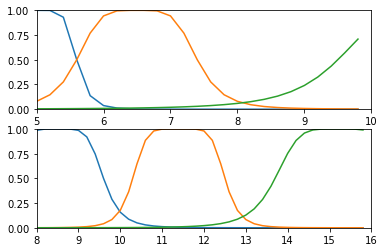

In [298]:
#Phase 1 Experimentation
p = {'S1alpha' : .6,   'S1beta' : 3.2,   'S1gamma' : 5, 
    'M1alpha' : .9,     'M1beta' : 2.4,  'M1gamma' : 6.5, 
    'L1alpha' : 1.5,   'L1beta' : 2.0,   'L1gamma' : 11, 
    'S2alpha' : 1.1,   'S2beta' : 2.7,   'S2gamma' : 8.5, 
    'M2alpha' : 1.1,   'M2beta' : 3.2,   'M2gamma' : 11.4, 
    'L2alpha' : 1.5,   'L2beta' : 2.5, 'L2gamma' : 15.2}
initializedata()
Layer1()
Layer2()
Layer3()
Layer4()
Layer5()
Layer6()
PlotMembershipFunctions()
RMSE()

In [303]:
#Phase 1 Experimentation
i = .1
p = {'S1alpha' : .6,   'S1beta' : 3.2,   'S1gamma' : 5, 
    'M1alpha' : .9,     'M1beta' : 2.4,  'M1gamma' : 6.5, 
    'L1alpha' : 1.5,   'L1beta' : 2.0,   'L1gamma' : 11, 
    'S2alpha' : 1.1,   'S2beta' : 2.7,   'S2gamma' : 8.5, 
    'M2alpha' : 1.1,   'M2beta' : 3.2,   'M2gamma' : 11.4, 
    'L2alpha' : 1.5,   'L2beta' : 2.5, 'L2gamma' : 15.2}
for L1 in ('S1', 'M1', 'L1'):
    for A1 in (p[L1+'alpha']-i, p[L1+'alpha'], p[L1+'alpha']+i): #np.arange(0, 5, 1):
        p[L1+'alpha'] = A1
        for B1 in (p[L1+'beta']-i, p[L1+'beta'], p[L1+'beta']+i): #np.arange(0, 9, 1):
            p[L1+'beta'] = B1        
            for G1 in (p[L1+'gamma']-i, p[L1+'gamma'], p[L1+'gamma']+i): #np.arange(5, 10, 1):
                p[L1+'gamma'] = G1 
                for L2 in ('S2', 'M2', 'L2'):
                    for A2 in (p[L2+'alpha']-i, p[L2+'alpha'], p[L2+'alpha']+i): #np.arange(0, 5, 1):
                        p[L2+'alpha'] = A2
                        for B2 in (p[L2+'beta']-i, p[L2+'beta'], p[L2+'beta']+i): #np.arange(0,9, 1):
                            p[L2 + 'beta'] = B2
                            for G2 in (p[L2+'gamma']-i, p[L2+'gamma'], p[L2+'gamma']+i): #np.arange(8, 15, 1):
                                p[L2+'gamma'] = G2
                                initializedata()
                                Layer1()
                                Layer2()
                                Layer3()
                                Layer4()
                                Layer5()
                                Layer6()
                                Fitness[(L1, A1, B1, G1, L2, A2, B2, G2)] = RMSE()
                                #print((L1, A1, B1, G1, L2, A2, B2, G2), Fitness[(L1, A1, B1, G1, L2, A2, B2, G2)]))
                    print(L1, L2)
#MapFitness()
newdf = pd.DataFrame.from_dict(Fitness, orient='index', columns=['RMSE'])

newdf.to_csv("fourth run.csv")
newdf

S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
S1 S2
S1 M2
S1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
M1 S2
M1 M2
M1 L2
L1 S2
L1 M2
L1 L2
L1 S2
L1 M

,RMSE
"(S1, 0.1, 0.1, 5, S2, 0.1, 0.1, 8)",4.116486
"(S1, 0.1, 0.1, 5, S2, 0.1, 0.1, 12)",4.230171
"(S1, 0.1, 0.1, 5, S2, 0.1, 0.1, 16)",4.618776
"(S1, 0.1, 0.1, 5, S2, 0.1, 0.5, 8)",3.668568
"(S1, 0.1, 0.1, 5, S2, 0.1, 0.5, 12)",3.846999
...,...
"(L1, 1.6, 2.3000000000000003, 11.899999999999997, L2, 9.599999999999982, 26.70000000000011, 87.89999999999931)",8.982945
"(L1, 1.6, 2.3000000000000003, 11.899999999999997, L2, 9.599999999999982, 26.70000000000011, 87.9999999999993)",9.059774
"(L1, 1.6, 2.3000000000000003, 11.899999999999997, L2, 9.599999999999982, 26.80000000000011, 87.89999999999931)",9.363779
"(L1, 1.6, 2.3000000000000003, 11.899999999999997, L2, 9.599999999999982, 26.80000000000011, 87.9999999999993)",9.424858


In [ ]:
#OLD LAYER 5



# calculate initial C0, C1, C2 based on total data

# partial derivatives = of E = 1/2 SUM(aX1 + bX2 + c - y)
# dE/da = aSUM(X1**2) + bSUM(X1X2) + cSUM(X1) =  SUM(X1Y)
# dE/db = aSUM(X1X2) + bSUM(X2**2) + cSUM(X2) = SUM(X2Y)
# dE/dc = aSUM(X1) + bSUM(X2) + 10c = SUM(Y)
#
# this will yield three simultaneous equations, 
# once solved, a = C1, b = C2, c = C0

# anfis['SQRX1'] = anfis['X1']**2
# anfis['SQRX2'] = anfis['X2']**2
# anfis['X1Y'] = anfis['X1'] * anfis['Y']
# anfis['X2Y'] = anfis['X2'] * anfis['Y']
# anfis['X1X2'] = anfis['X1'] * anfis['X2']

# sumX1 = anfis['X1'].sum(); print('Sum X1 = ', sumX1)
# sumX2 = anfis['X2'].sum(); print('Sum X2 = ', sumX2)
# sumY = anfis['Y'].sum(); print('Sum Y = ', sumY)
# sumSQRX1 = anfis['SQRX1'].sum(); print('Sum X1 squared = ', sumSQRX1)
# sumSQRX2 = anfis['SQRX2'].sum(); print('Sum X2 squared = ', sumSQRX2)
# sumX1X2 = anfis['X1X2'].sum(); print('Sum X1X2 = ', sumX1X2)
# sumX1Y = anfis['X1Y'].sum(); print('Sum X1Y = ', sumX1Y)
# sumX2Y = anfis['X2Y'].sum(); print('Sum X2Y = ', sumX1Y)

# # Create array of array of a, b, c coefficiencts = [a1, b1, c1], [a2, b2, c2], [a3, b3, c3]
# # Create array or ordinate or dependent values [Y1, Y2, Y3] 
# # such that a1X1 + b1X2 + C1 = Y1, etc.
# Coef = np.array([[sumSQRX1, sumX1X2, sumX1], [sumX1X2, sumSQRX2, sumX2], [sumX1, sumX2, 10]])
# Ord = np.array([sumX1Y, sumX2Y, sumY])
# Params = np.linalg.solve(Coef, Ord)
# startC0 = Params[2]; print('C0 = ', startC0)
# startC1 = Params[0]; print('C1 = ', startC1)
# startC2 = Params[1]; print('C2 = ', startC2)


#calculate function activation for each rule, using initial C0, C1, C2 values
#



# anfis['F1'] = anfis['N1'] * ( startC0 + startC1 * anfis['X1'] + startC2 * anfis['X2'])
# anfis['F2'] = anfis['N2'] * ( startC0 + startC1 * anfis['X1'] + startC2 * anfis['X2'])
# anfis['F3'] = anfis['N3'] * ( startC0 + startC1 * anfis['X1'] + startC2 * anfis['X2'])
# anfis['F4'] = anfis['N4'] * ( startC0 + startC1 * anfis['X1'] + startC2 * anfis['X2'])
# anfis['F5'] = anfis['N5'] * ( startC0 + startC1 * anfis['X1'] + startC2 * anfis['X2'])
# anfis['F6'] = anfis['N6'] * ( startC0 + startC1 * anfis['X1'] + startC2 * anfis['X2'])
# anfis['F7'] = anfis['N7'] * ( startC0 + startC1 * anfis['X1'] + startC2 * anfis['X2'])
# anfis['F8'] = anfis['N8'] * ( startC0 + startC1 * anfis['X1'] + startC2 * anfis['X2'])
# anfis['F9'] = anfis['N9'] * ( startC0 + startC1 * anfis['X1'] + startC2 * anfis['X2'])

In [82]:
#Old Layer 1
S1alpha = 1.5;  S1beta = 2; S1gamma = 5
M1alpha = 1;    M1beta = 2; M1gamma = 7.5
L1alpha = 1.5;  L1beta = 2; L1gamma = 10
S2alpha = 2.5;  S2beta = 2; S2gamma = 8
M2alpha = 1.5;  M2beta = 2; M2gamma = 12
L2alpha = 2.5;  L2beta = 2; L2gamma = 16
#Old Layer 5
R1C0 = 29;      R1C1 = -1.2;    R1C2 = -2.4
R2C0 = 6.4;     R2C1 = -1.4;    R2C2 = .35
R3C0 = -15;     R3C1 = -1.2;    R3C2 = 1.9
R4C0 = 22;      R4C1 = .6;      R4C2 = -2.4
R5C0 = -7.2;    R5C1 = .7;      R5C2 = .3
R6C0 = -24.5;   R6C1 = .6;      R6C2 = 1.7
R7C0 = 9;       R7C1 = 1.4;     R7C2 = -1.7
R8C0 = -12.1;   R8C1 = 1.6;     R8C2 = .1
R9C0 = -46.5;   R9C1 = 1.9;     R9C2 = 2.5


2.5